<h1>Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction:-Time-Series-Analysis-and-Forecasting-Project" data-toc-modified-id="Introduction:-Time-Series-Analysis-and-Forecasting-Project-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction: Time Series Analysis and Forecasting Project</a></span><ul class="toc-item"><li><span><a href="#Dataset" data-toc-modified-id="Dataset-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Dataset</a></span></li></ul></li><li><span><a href="#Exploratory-Data-Analysis" data-toc-modified-id="Exploratory-Data-Analysis-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Exploratory Data Analysis</a></span><ul class="toc-item"><li><span><a href="#Read-in-Data-and-Examine" data-toc-modified-id="Read-in-Data-and-Examine-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Read in Data and Examine</a></span><ul class="toc-item"><li><span><a href="#Dataset-Explanation" data-toc-modified-id="Dataset-Explanation-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Dataset Explanation</a></span></li><li><span><a href="#Data-Visualization" data-toc-modified-id="Data-Visualization-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Data Visualization</a></span></li></ul></li><li><span><a href="#Baseline-Model" data-toc-modified-id="Baseline-Model-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Baseline Model</a></span></li></ul></li><li><span><a href="#Weather-Forecast-using-SARIMA-model" data-toc-modified-id="Weather-Forecast-using-SARIMA-model-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Weather Forecast using SARIMA model</a></span><ul class="toc-item"><li><span><a href="#Parameter-Selection" data-toc-modified-id="Parameter-Selection-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Parameter Selection</a></span><ul class="toc-item"><li><span><a href="#Grid-Search" data-toc-modified-id="Grid-Search-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Grid Search</a></span></li></ul></li><li><span><a href="#Fitting-the-Model" data-toc-modified-id="Fitting-the-Model-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Fitting the Model</a></span></li><li><span><a href="#Model-Diagnostics" data-toc-modified-id="Model-Diagnostics-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Model Diagnostics</a></span></li><li><span><a href="#Validating-the-Non-Dynamic-Forecast" data-toc-modified-id="Validating-the-Non-Dynamic-Forecast-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Validating the Non-Dynamic Forecast</a></span><ul class="toc-item"><li><span><a href="#Forecast-Diagnostic" data-toc-modified-id="Forecast-Diagnostic-3.4.1"><span class="toc-item-num">3.4.1&nbsp;&nbsp;</span>Forecast Diagnostic</a></span></li></ul></li><li><span><a href="#Validating-the-Dynamic-Forecast" data-toc-modified-id="Validating-the-Dynamic-Forecast-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Validating the Dynamic Forecast</a></span><ul class="toc-item"><li><span><a href="#Forecast-Diagnostic" data-toc-modified-id="Forecast-Diagnostic-3.5.1"><span class="toc-item-num">3.5.1&nbsp;&nbsp;</span>Forecast Diagnostic</a></span></li></ul></li></ul></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></div>

# Introduction: Time Series Analysis and Forecasting Project

## Dataset

The data have been downloaded from the website http://rp5.ru/. The data are average daily temperatures collected by the weather station 2978 in Helsinki from January 2015 to September 2019

# Exploratory Data Analysis

## Read in Data and Examine

In [1]:
# Change to the data directory
import os
os.chdir('data') # You should change to the corresponding directory in your computer 
os.listdir()

['weather_data_train.csv',
 'weather_data_train_labels.csv',
 'weather_data_test_labels.csv',
 'weather_data_test.csv']

In [2]:
# Import numpy, pandas for data manipulation
import numpy as np
import pandas as pd

# Import matplotlib, seaborn for visualization
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Import the data
weather_data = pd.read_csv('weather_data_test.csv',parse_dates=['datetime'], sep=';', decimal=','
                     , infer_datetime_format=True)

# Check the shape of the dataset
print(weather_data.shape)

# Select the datetime and the temperature columns
temp_df = weather_data[["datetime","T_mu"]]
temp_df.head(10)

(1346, 17)


,datetime,T_mu
0,2015-09-03,13.7375
1,2015-09-04,14.8250
2,2015-09-05,14.2750
3,2015-09-06,13.1250
4,2015-09-07,12.0875
5,2015-09-08,12.5375
6,2015-09-10,13.0625
7,2015-09-11,13.5375
8,2015-09-12,14.7500
9,2015-09-13,15.1375


### Dataset Explanation

In [3]:
# Check the shape of the dataset
temp_df.shape

(1346, 2)

Using the past temperature data as far as 2015 is not a good indicator for today's weather data as the temperature might have been influenced by other recent factors, including the rising of global warming. 

Thus, for analysis and forecasting, we only use a subset of data from 2016 to 2019 as it accounts for more recent factors.

In [4]:
# Select the subset data from 2016 to 2019
mask = (temp_df['datetime'] >= '2016-01-01') & (temp_df['datetime'] <= '2019-05-21')
temp_df = temp_df.loc[mask]

# Reset the index 
temp_df.set_index("datetime", inplace=True)

# Inspect first 5 rows and last 5 rows of the data
from IPython.display import display
display(temp_df.head(5))
display(temp_df.tail(5))

,T_mu
datetime,
2016-01-01,-4.5500
2016-01-02,-7.0000
2016-01-03,-8.7375
2016-01-04,-11.1750
2016-01-05,-17.6250


,T_mu
datetime,
2019-05-17,13.783333
2019-05-18,15.508333
2019-05-19,16.595833
2019-05-20,17.258333
2019-05-21,18.433333


For simplicity, the T_mu column above shows the daily average temperatures in Helsinki for the first 5 days of January 2016 and last 5 days of May 2019 in Helsinki, Finland.

In order to get more information, Python Pandas library provides a 'describe' function to show the count, mean, standard deviation, min/ max value and the quantiles of our dataset:

In [5]:
temp_df.describe()

,T_mu
count,1228.000000
mean,6.302811
std,8.433225
min,-22.675000
25%,0.559375
50%,5.227083
75%,13.784375
max,26.145833


In [6]:
# Output the maximum and minimum temperature date
print(temp_df.loc[temp_df["T_mu"] == temp_df["T_mu"].max()])
print(temp_df.loc[temp_df["T_mu"] == temp_df["T_mu"].min()])

                 T_mu
datetime             
2018-07-17  26.145833
              T_mu
datetime          
2016-01-07 -22.675


**Observations:** 

* On 17 July 2018, Helsinki witnessed the hottest date in the 4-year period (2016–2019). The temperature was 26.1 degrees Celsius. In contrast, on 07 January 2016, Helsinki citizens saw the coldest date in the 4-year period, when the temperature dropped to as terribly low as -22.6 degrees Celsius.
* There was not a significant difference between the median and the mean, being approximately 5.8 and 6.6 degrees Celsius respectively.

### Data Visualization

Let’s explore this time series as a data visualization:

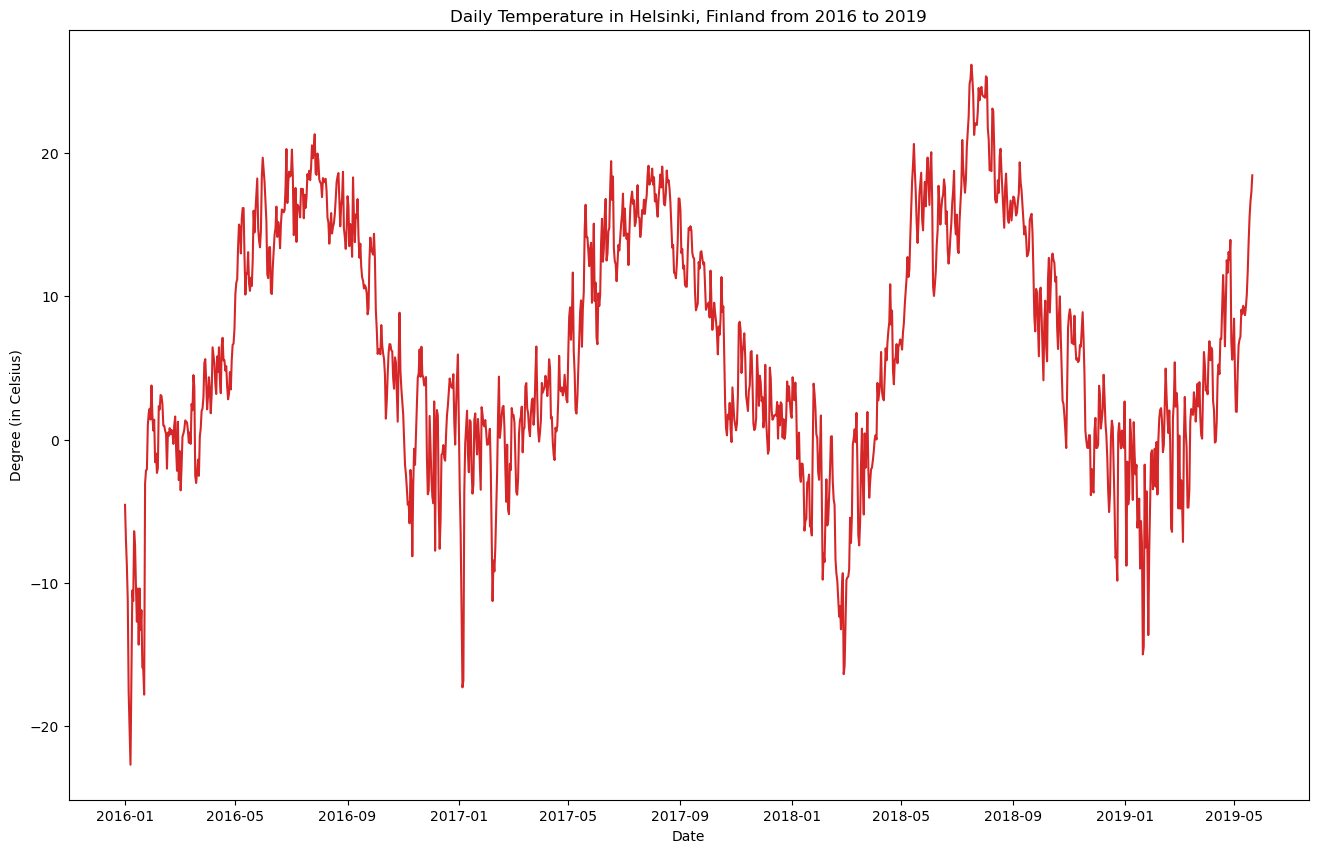

In [7]:
# Plot the daily temperature change 
plt.figure(figsize=(16,10), dpi=100)
plt.plot(temp_df.index, temp_df.T_mu, color='tab:red')
plt.gca().set(title="Daily Temperature in Helsinki, Finland from 2016 to 2019", xlabel='Date', ylabel="Degree (in Celsius)")
plt.show()

Some distinguishable patterns appear when we plot the data. The time-series has seasonality pattern, such as temperatures are always low at the beginning of the year and high at the middle of the year. Compared to our common knowledge, Finnish weather is pretty harsh and cold, almost no sunlight during January and February, and there is a holiday called 'Midsummer Day' in June when Finns celebrate the comeback of the sun.

However, the plot above is a bit noisy, because it contains all the daily temperatures. However, looking carefully into the data points, we could see that there is only a minor temperature change between the current date and the next date. 

**How could we plot the graph containing only longer-than-daily temperature change and thus looks neater?**

Here is the tool: 
The moving average is mostly used with time series data to capture the short-term fluctuations while focusing on longer trends.

<AxesSubplot: xlabel='datetime'>

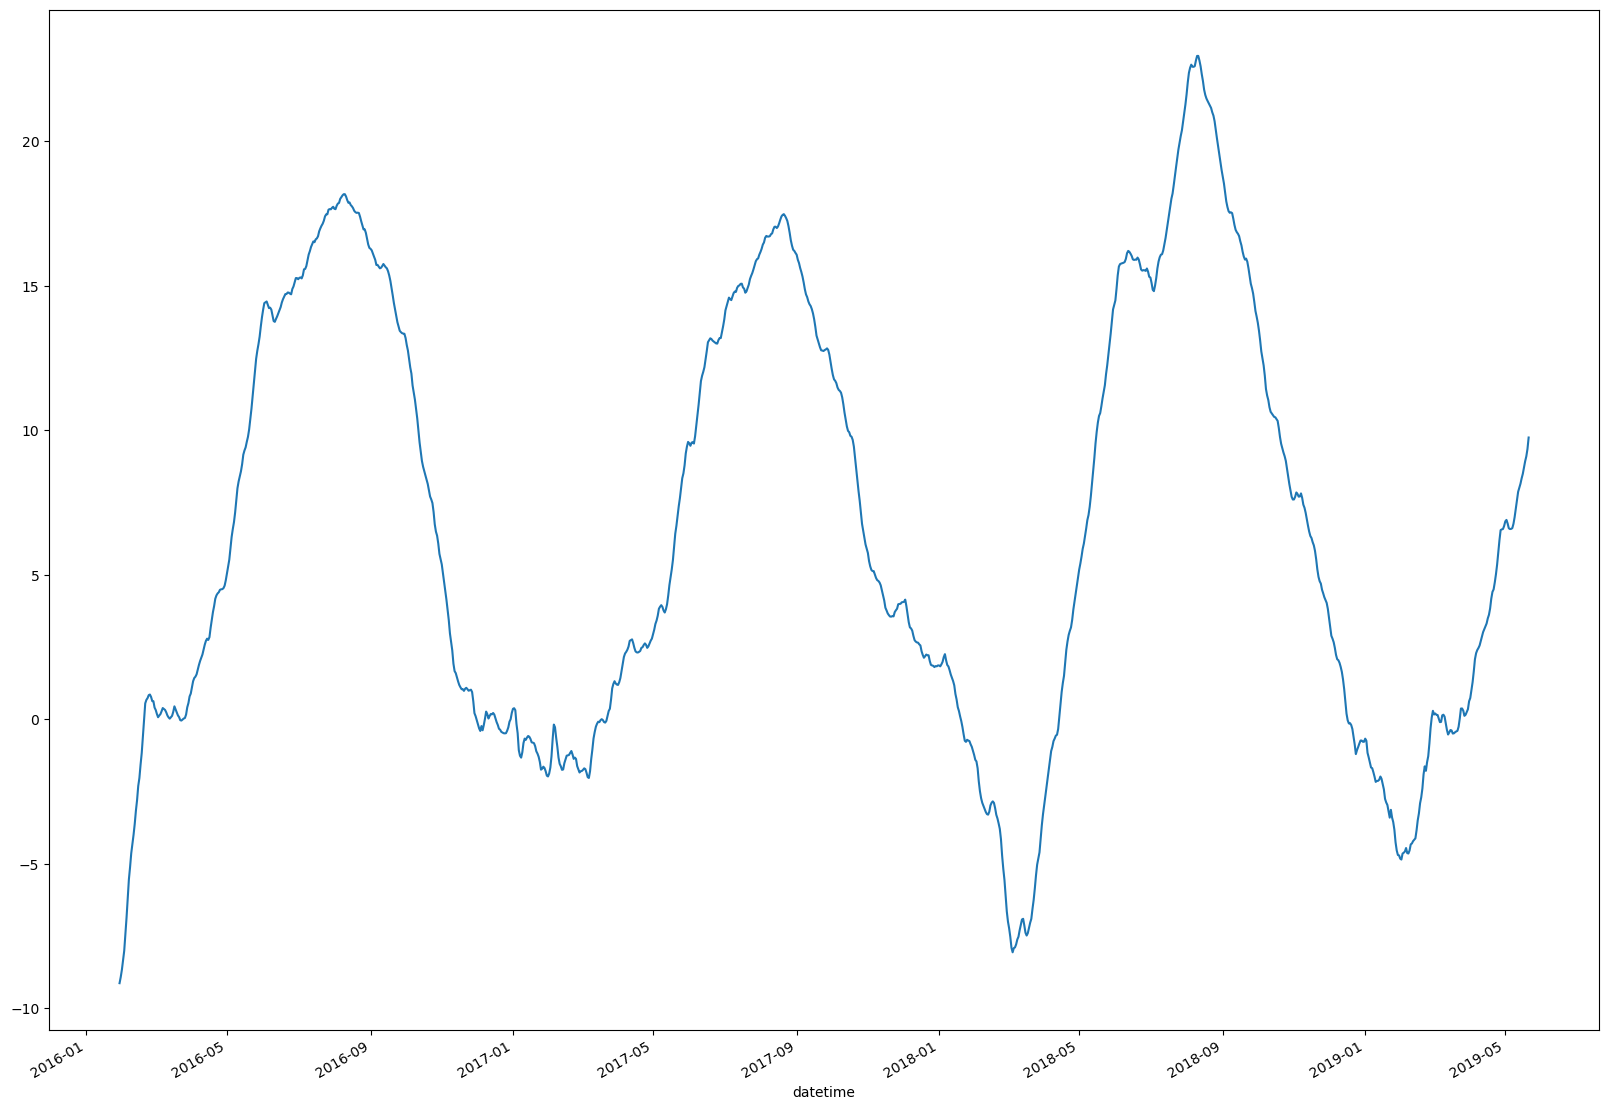

In [8]:
# Apply the Moving Average function by a subset of size 30 days.
temp_df_mean = temp_df.T_mu.rolling(window=30).mean()
temp_df_mean.plot(figsize=(20,15))

Some distinguishable patterns appear when we plot the data. The time-series has seasonality pattern, such as temperatures are always low at the beginning of the year and high at the middle of the year. Compared to our common knowledge, Finnish weather is pretty harsh and cold, almost no sunlight during January and February, and there is a holiday called 'Midsummer Day' in June when Finns celebrate the comeback of the sun.

We can also visualize our data using a method called time-series decomposition that allows us to decompose our time series into three distinct components: trend, seasonality, and noise.

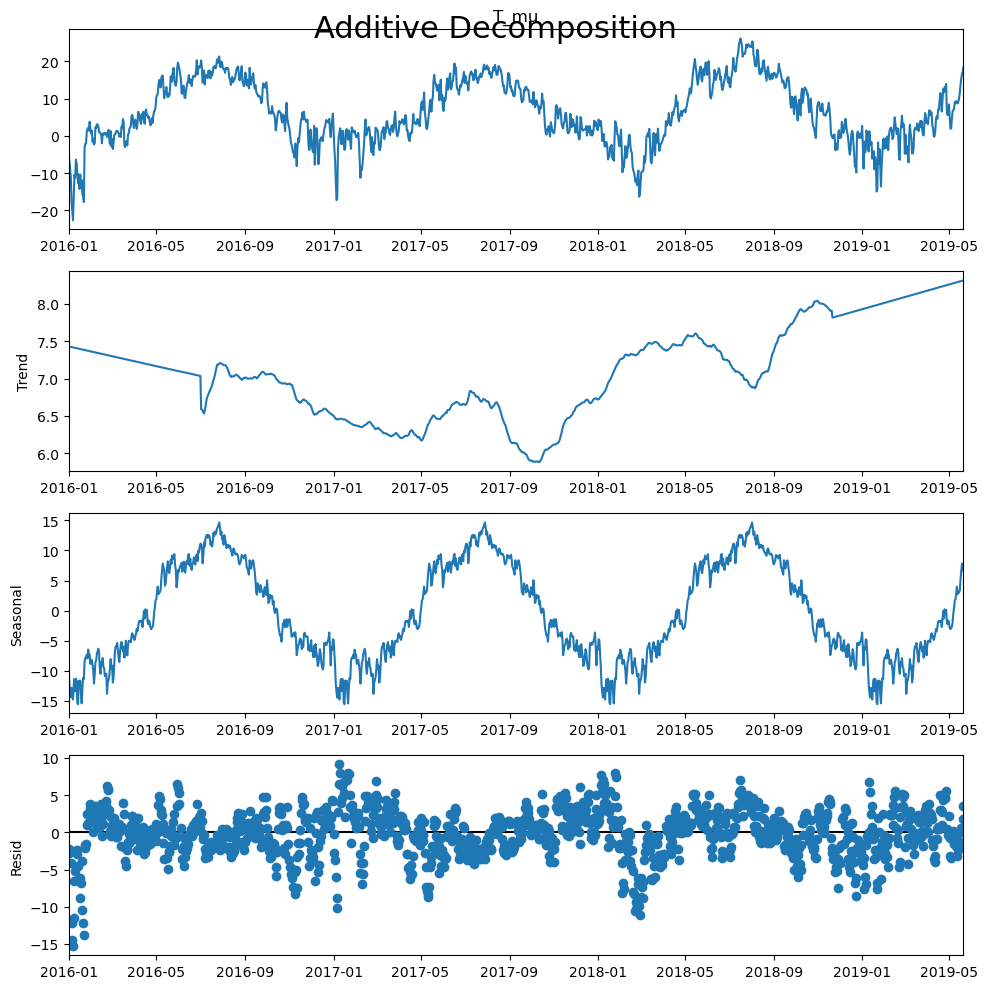

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Additive Decomposition
result_add = seasonal_decompose(temp_df.T_mu, model='additive', extrapolate_trend='freq', period=365)

# Plot
plt.rcParams.update({'figure.figsize': (10, 10)})
result_add.plot().suptitle('Additive Decomposition', fontsize=22)
plt.show()


 The plot above clearly shows that the temperature is unstable, along with its obvious seasonality.

## Baseline Model

Since the change of temperature is not significant between 2 days, it is reasonable to produce a most basic model in which it uses the current temperature as a prediction for the next day.

**Thus, we would predict the weather based on an assumption:** The air temperature today depends on the air temperature yesterday, the air temperature yesterday depends on the day before yesterday, and so on.

Here, I use 1-step prediction to model the temperature as a time series:

In [11]:
# Shift the current temperature to the next day. 
predicted_df = temp_df["T_mu"].to_frame().shift(1).rename(columns = {"T_mu": "T_mu_pred" })
actual_df = temp_df["T_mu"].to_frame().rename(columns = {"T_mu": "T_mu_actual" })

# Concatenate the actual and predicted temperature
one_step_df = pd.concat([actual_df,predicted_df],axis=1)

# Select from the second row, because there is no prediction for today due to shifting.
one_step_df = one_step_df[1:]
one_step_df.head(10)

,T_mu_actual,T_mu_pred
datetime,,
2016-01-02,-7.0000,-4.5500
2016-01-03,-8.7375,-7.0000
2016-01-04,-11.1750,-8.7375
2016-01-05,-17.6250,-11.1750
2016-01-06,-20.2625,-17.6250
2016-01-07,-22.6750,-20.2625
2016-01-08,-16.5250,-22.6750
2016-01-09,-10.5250,-16.5250
2016-01-10,-11.2500,-10.5250


We could validate how well our model is by looking at the Root Mean Squared Error(RMSE) between the predicted and actual temperature:

In [12]:
from sklearn.metrics import mean_squared_error as MSE
from math import sqrt

# Calculate the RMSE
temp_pred_err = MSE(one_step_df.T_mu_actual, one_step_df.T_mu_pred, squared=False)
print("The RMSE is",temp_pred_err)

The RMSE is 2.2618558244607696


Hoooorayyyy! The RMSE is small, meaning that we can use the most basic 1-step prediction baseline model to predict the upcoming day's temperature with the average error of only 2.2 degrees Celsius. The error is acceptable, especially in the Weather Forecast field in which there are many other attributes that also affect the weather (e.g wind speed, atmospheric pressure, humidity, etc).

Another widely-used technique for time series prediction is SARIMA Model. I would like to see if it is possible to lower the prediction error (although it is already really small and totally okay to use it with small tolerance).

# Weather Forecast using SARIMA model

## Parameter Selection 

### Grid Search

We are going to apply one of the most commonly used method for time-series forecasting, known as SARIMA, which stands for Seasonal Autoregressive Integrated Moving Average.
SARIMA models are denoted with the notation SARIMA(p,d,q)(P,D,Q,s). These three parameters account for seasonality, trend, and noise in data:

We will use a “grid search” to iteratively explore different combinations of parameters. For each combination of parameters, we fit a new seasonal SARIMA model with the SARIMAX() function from the statsmodels module and assess its overall quality.

In [13]:
import itertools

# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


The AIC measures how well a model fits the data while taking into account the overall complexity of the model. A model that fits the data very well while using lots of features will be assigned a larger AIC score than a model that uses fewer features to achieve the same goodness-of-fit. Therefore, we are interested in finding the model that yields the lowest AIC value.

In [14]:
import warnings
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(one_step_df.T_mu_actual,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('SARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

The output of our code suggests that SARIMAX(1, 1, 1)x(0, 1, 1, 12)12 yields the lowest AIC value of 5329.98. We should therefore consider this to be optimal option out of all the models we have considered.

## Fitting the Model

In [15]:
# Import the statsmodels library for using SARIMAX model
import statsmodels.api as sm

# Fit the SARIMAX model using optimal parameters
mod = sm.tsa.statespace.SARIMAX(one_step_df.T_mu_actual,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.57063D+00    |proj g|=  3.90338D-01

At iterate    5    f=  2.19565D+00    |proj g|=  9.78964D-02

At iterate   10    f=  2.16816D+00    |proj g|=  2.34085D-01
  ys=-4.469E-03  -gs= 4.253E-03 BFGS update SKIPPED

At iterate   15    f=  2.16788D+00    |proj g|=  2.03208D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     18     34      1     1     0   2.664D-06   2.168D+00
  F =   2.1678831742901954     

CONVERGENCE: NORM

## Model Diagnostics

The plot_diagnostics object allows us to quickly generate model diagnostics and investigate for any unusual behavior:

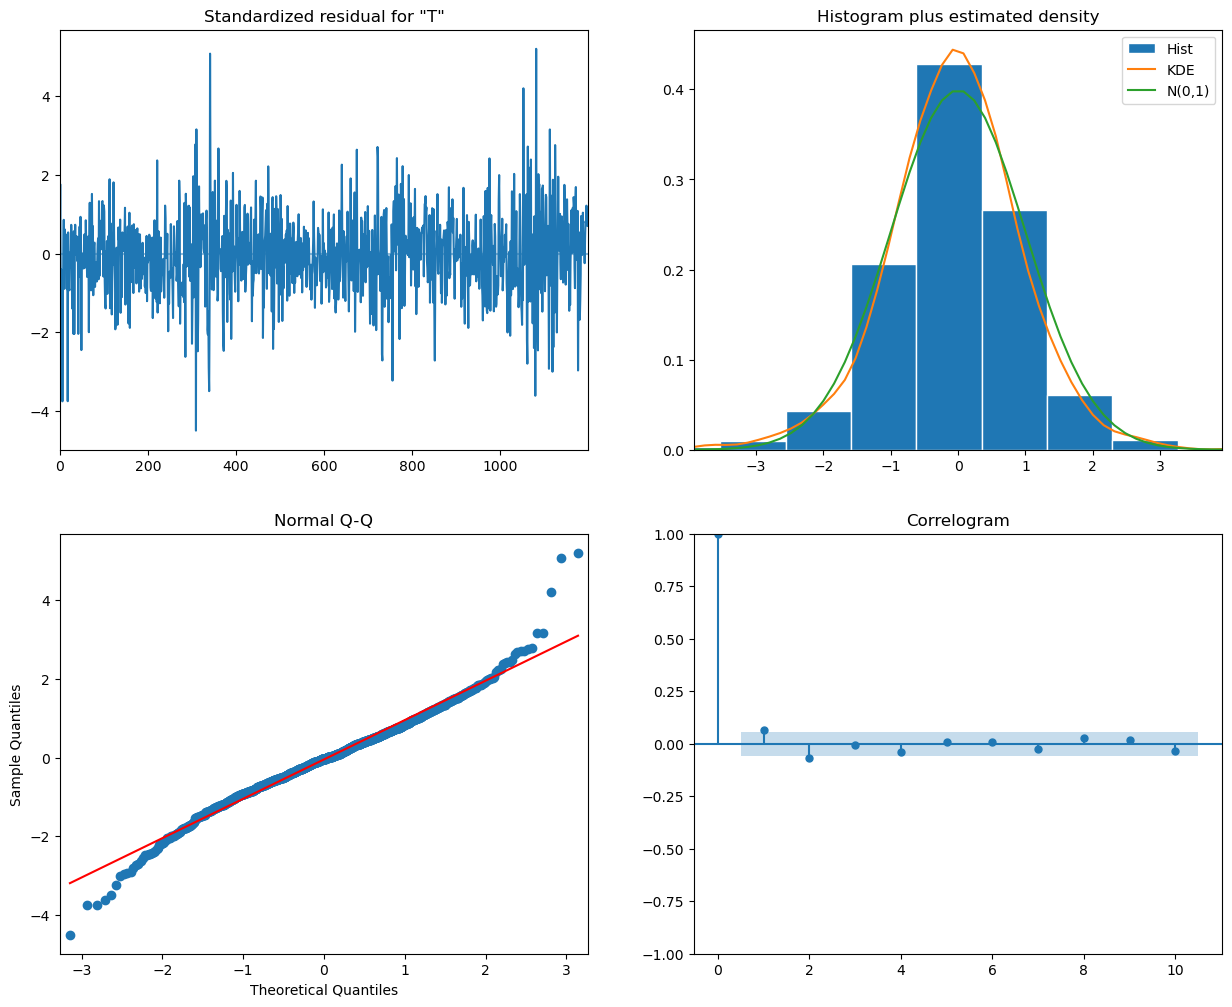

In [16]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

Our primary concern is to ensure that the residuals of our model are uncorrelated and normally distributed with zero-mean. If the seasonal ARIMA model does not satisfy these properties, it is a good indication that it can be further improved.

In this case, our model diagnostics suggests that the model residuals are normally distributed based on the following:

* In the top right plot, we see that the red KDE line follows closely with the N(0,1) line (where N(0,1)) is the standard notation for a normal distribution with mean 0 and standard deviation of 1). This is a good indication that the residuals are normally distributed.
* The qq-plot on the bottom left shows that the ordered distribution of residuals (blue dots) follows the linear trend of the samples taken from a standard normal distribution with N(0, 1). Again, this is a strong indication that the residuals are normally distributed.
* The residuals over time (top left plot) do not display any obvious seasonality and appear to be white noise. This is confirmed by the autocorrelation (i.e. correlogram) plot on the bottom right, which shows that the time series residuals have low correlation with lagged versions of itself.

Those observations lead us to conclude that our model produces a satisfactory fit that could help us understand our time series data and forecast future values.

## Validating the Non-Dynamic Forecast

The get_prediction() and conf_int() attributes allow us to obtain the values and associated confidence intervals for forecasts of the time series.

In [17]:
pred = results.get_prediction(start=pd.to_datetime('2017-05-19'), dynamic=False)
pred_ci = pred.conf_int()

The code above requires the forecasts to start at June 2017.

The dynamic=False argument ensures that we produce one-step ahead forecasts, meaning that forecasts at each point are generated using the full history up to that point.

We can plot the real and forecasted values of the average daily temperature to assess how well we did. Notice how we zoomed in on the end of the time series by slicing the date index.

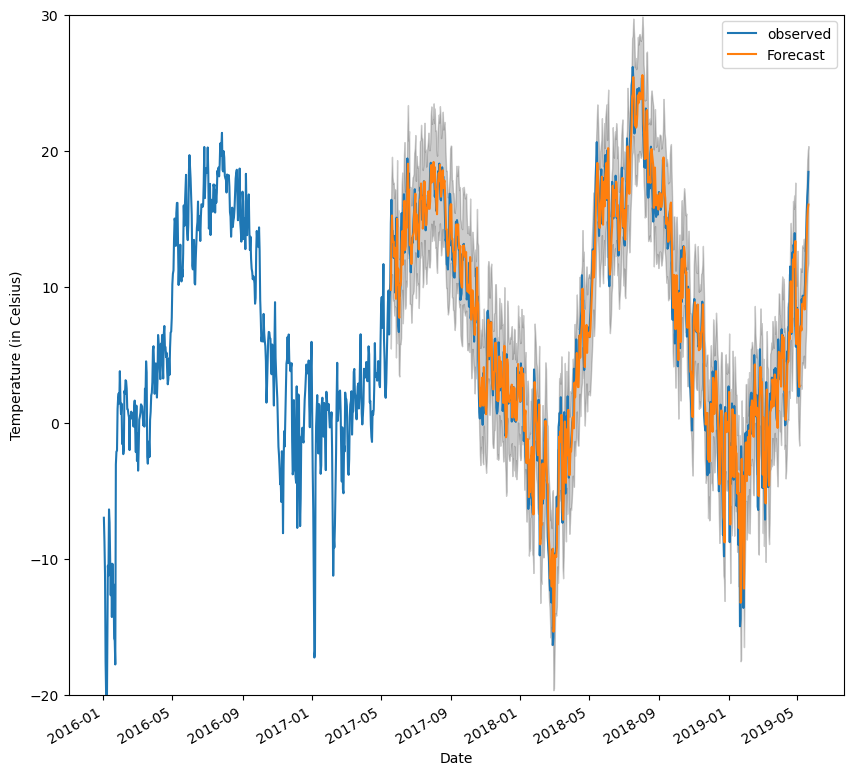

In [18]:
ax = one_step_df.T_mu_actual['2015':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='Forecast')

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Temperature (in Celsius)')
plt.ylim([-20,30])
plt.legend()
plt.show()

Overall, our forecasts align with the true values very well, showing a seasonal cycle of length 365 days.

### Forecast Diagnostic

It is also useful to quantify the accuracy of our forecasts. We will use the MSE (Mean Squared Error), in which  for each predicted value, we compute its distance to the true value and square the result.

In [19]:
y_forecasted = pred.predicted_mean
y_truth = one_step_df.T_mu_actual['2017-05-19':]
print(y_forecasted.shape)
print(y_truth.shape)
# Compute the mean square error
mse = MSE(y_truth, y_forecasted, squared=True)
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

(727,)
(727,)
The Mean Squared Error of our forecasts is 4.78


Amazziingggg! Our forecast model forecasts the temperature with only an error of 4.78 degrees Celsius. 

In the weather forecast field, the prediction error of 2.19 degrees seems promising and sufficient, as there are many other factors that contribute to the change in temperature, including but not limited to the wind speed, the air pressure, etc.

## Validating the Dynamic Forecast

In this case, we only use information from the time series up to a certain point, and after that, forecasts are generated using values from previous forecasted time points.

In the code chunk below, we specify to start computing the dynamic forecasts and confidence intervals from May 2017 onwards.

In [20]:
pred_dynamic = results.get_prediction(start=pd.to_datetime('2017-05-19'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

Once again, we plot the real and forecasted values of the average daily temperature to assess how well we did:

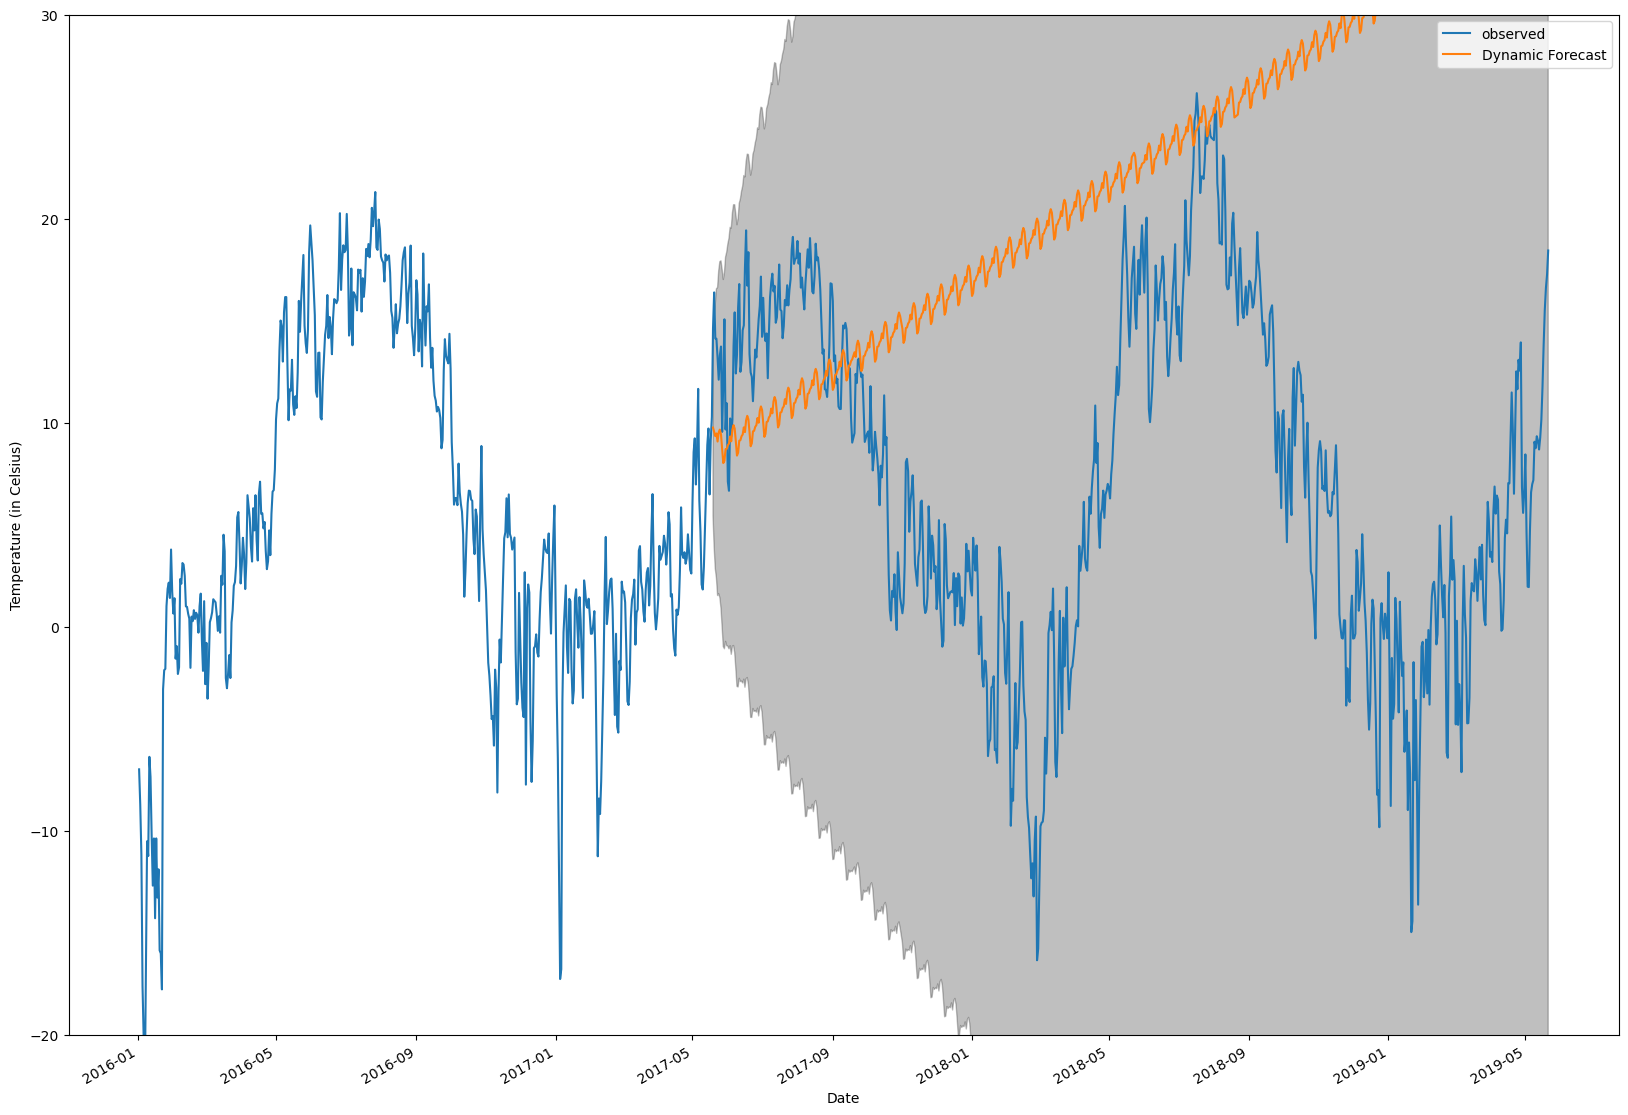

In [21]:
ax = one_step_df.T_mu_actual['2015':].plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)


ax.set_xlabel('Date')
ax.set_ylabel('Temperature (in Celsius)')
plt.ylim([-20,30])
plt.legend()
plt.show()



In this case, the model seems to predict the temperature inaccurately, with major fluctuations between the true value and the predicted value.

### Forecast Diagnostic

Once again, we measure the goodness of our model using RMSE:

In [22]:
# Extract the predicted and true values of our time series
y_forecasted = pred_dynamic.predicted_mean
y_truth = one_step_df.T_mu_actual['2017-05-19':]

# Compute the mean square error
mse = sqrt(MSE(y_truth, y_forecasted).mean())
print('The Root Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Root Mean Squared Error of our forecasts is 20.04


The predicted values obtained from the dynamic forecasts yield an MSE of 20.04. This is significantly higher than the one-step ahead, which is to be expected given that we are relying on less historical data from the time series.

# Conclusion

Recall that in the assumption we made in the section 2.2 Baseline Model, we could even reinforce our assumption and continue our belief that the air temperature today depends on the air temperature yesterday, the air temperature yesterday depends on the day before yesterday, and so on. 

It is the best so far to use the history up to the point that we would like to make predictions on. Especially it holds for weather forecasting, where the temperature today does not change much from yesterday, and the transition to another season signaling through the temperature should gradually occur, unless there is any disastrous factors such as storm, drought, etc.